In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\Luan\AppData\Local\Temp\ipykernel_7748\1355507867.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Sem doença", "Com doença"])


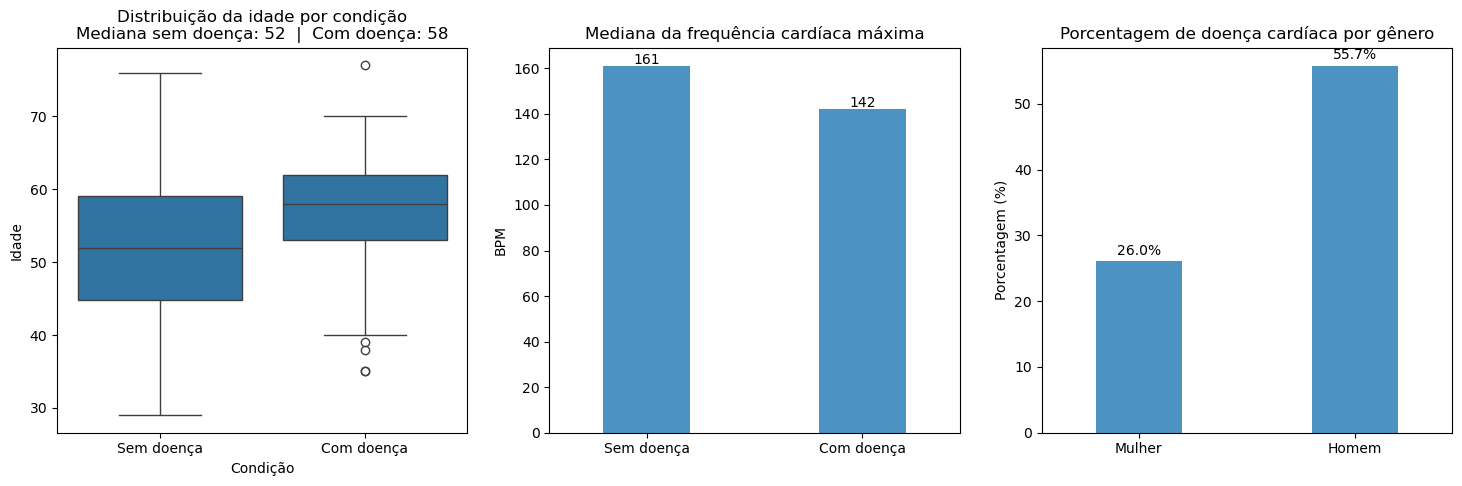

In [8]:
df = pd.read_csv("pacientes/coracao.csv")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

medianas = df.groupby("condition")["age"].median()

sns.boxplot(
    x="condition",
    y="age",
    data=df,
    ax=axes[0]
)

axes[0].set_title(
    f"Distribuição da idade por condição\n"
    f"Mediana sem doença: {medianas.loc[0]:.0f}  |  "
    f"Com doença: {medianas.loc[1]:.0f}"
)

axes[0].set_xlabel("Condição")
axes[0].set_ylabel("Idade")
axes[0].set_xticklabels(["Sem doença", "Com doença"])


medianas_thalach = df.groupby("condition")["thalach"].median()
medianas_thalach.index = ["Sem doença", "Com doença"]

medianas_thalach.plot(
    kind="bar",
    ax=axes[1],
    width=0.4,
    alpha=0.8
)

axes[1].set_title("Mediana da frequência cardíaca máxima")
axes[1].set_ylabel("BPM")
axes[1].set_xlabel("")
axes[1].tick_params(axis="x", rotation=0)

for i, valor in enumerate(medianas_thalach):
    axes[1].text(i, valor + 1, f"{valor:.0f}", ha="center")


porcentagem_doenca = pd.Series(
    {
        "Mulher": (25 / 96) * 100,
        "Homem": (112 / 201) * 100
    }
)

porcentagem_doenca.plot(
    kind="bar",
    ax=axes[2],
    width=0.4,
    alpha=0.8
)

axes[2].set_title("Porcentagem de doença cardíaca por gênero")
axes[2].set_ylabel("Porcentagem (%)")
axes[2].set_xlabel("")
axes[2].tick_params(axis="x", rotation=0)

for i, valor in enumerate(porcentagem_doenca):
    axes[2].text(i, valor + 1, f"{valor:.1f}%", ha="center")

plt.savefig("dashboard.png", dpi=300, bbox_inches="tight")
plt.show()